In [ ]:
import tensorflow as tf
print(tf.__version__)

In [ ]:
import tensorflow as tf

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [ ]:
hello = tf.constant("Hello TensorFlow!")

sess = tf.Session()

print(sess.run(hello))

In [ ]:
a = tf.multiply(8, 5)
b = tf.multiply(4, 3)

In [ ]:
x = tf.Variable(13)
x

In [ ]:
W = tf.Variable(tf.random_normal([500, 111], stddev=0.35), name="weights")
W

In [ ]:
tf.global_variables_initializer()

In [ ]:
x = tf.Variable(1212)
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    print(sess.run(x))

In [ ]:
x = tf.constant(13)
x

## Placeholders and feed dictionaries

In [ ]:
x = tf.placeholder("float", None)
y = x+3

with tf.Session() as sess:
    result = sess.run(y, feed_dict={x : 5})
    print(result)

## tensorboard

In [ ]:
import tensorflow as tf

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [ ]:
tf.reset_default_graph()

x = tf.constant(1, name="x")
y = tf.constant(1, name="y")
a = tf.constant(3, name="a")
b = tf.constant(3, name="b")

In [ ]:
prod1 = tf.multiply(x, y, name="prod1")
prod2 = tf.multiply(a, b, name="prod2")

In [ ]:
sum = tf.add(prod1, prod2, name="sum")

In [ ]:
with tf.Session() as sess:
    writer = tf.summary.FileWriter(logdir="./graphs", graph = sess.graph)
    print(sess.run(sum))

## Creating a name scope

In [ ]:
with tf.name_scope("Product"):
    
    with tf.name_scope("prod1"):
        prod1 = tf.multiply(x, y, name="prod1")
    
    with tf.name_scope("prod2"):
        prod2 = tf.multiply(a, b, name="prod2")
    
with tf.name_scope("sum"):
    sum = tf.add(prod1, prod2, name="sum")
    
    
with tf.Session() as sess:
    writer = tf.summary.FileWriter("./graphs", sess.graph)
    print(sess.run(sum))
    

# Handwritten digit classification using Tensorflow

In [2]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [4]:
mnist = keras.datasets.mnist.load_data()

In [16]:
data_train = mnist[0][0]
data_train = mnist[0][1]
data_test = mnist[1][0]
data_test = mnist[1][1]

print(" ",mnist[0][0].shape)
print(" ",mnist[0][1].shape)
print(" ",mnist[1][0].shape)
print(" ",mnist[1][1].shape)

  (60000, 28, 28)
  (60000,)
  (10000, 28, 28)
  (10000,)


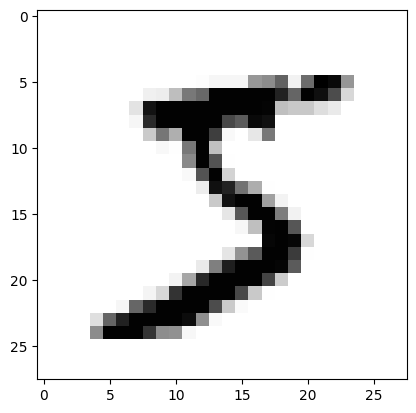

In [6]:
img1 = mnist[0][0][0].reshape(28, 28)
plt.imshow(img1, cmap = "Greys")

In [7]:
#number of neurons in input layer
num_input = 784
#num of neurons in hidden layer 1
num_hidden1 = 512
#num of neurons in hidden layer 2
num_hidden2 = 256
#num of neurons in hidden layer 3
num_hidden_3 = 128
#num of neurons in output layer
num_output = 10

## Placeholders

In [8]:
with tf.name_scope('input'):
    X = tf.placeholder("float", [None, num_input])
with tf.name_scope('output'):
    Y = tf.placeholder("float", [None, num_output])

In [9]:
with tf.name_scope("weights"):
    weights = {
        "w1" : tf.Variable(tf.truncated_normal([num_input, num_hidden1], stddev=0.1), name="weigth_1"),
        "w2" : tf.Variable(tf.truncated_normal([num_hidden1, num_hidden2], stddev=0.1), nmae="weigth_2"),
        "w3" : tf.Variable(tf.truncated_normal([num_hidden2, num_hidden_3], stddev=0.1), name="weigth_3"),
        "out" : tf.Variable(tf.truncated_normal([num_hidden_3, num_output], stddev=0.1), name="out")
    }

In [10]:
with tf.name_scope("biases"):
    biases = {
        "b1" : tf.Variable(tf.constant(0.1, shape=[num_hidden1]), name="bias_1"),
        "b2" : tf.Variable(tf.constant(0.1, shape=[num_hidden2]), name="bias_2"),
        "b3" : tf.Variable(tf.constant(0.1, shape=[num_hidden_3]), name="bias_3"),
        "out" : tf.Variable(tf.constant(0.1, shape=[num_output]), name="bias_4")
    }

## Forward propagation

In [11]:
with tf.name_scope("Model"):
    
    with tf.name_scope("layer1"):
        layer_1 = tf.nn.relu(tf.add(tf.matmul(X, weights["w1"]), biases["b1"]))
    
    with tf.name_scope("layer2"):
        layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, weights["w2"]), biases["b2"]))
    
    with tf.name_scope("layer3"):
        layer_3 = tf.nn.relu(tf.add(tf.matmul(layer_2, weights["w3"]), biases["b3"]))
    
    with tf.name_scope("output_layer"):
        y_hat = tf.nn.sigmoid(tf.matmul(layer_3, weights["out"]) + biases["out"])
        

## Computing loss and backpropagation

In [12]:
with tf.name_scope("Loss"):
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_hat, labels=Y))


learning_rate = 1e-4
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)


with tf.name_scope("Accuracy"):
    predicted_digit = tf.argmax(y_hat, 1)
    actual_digit = tf.argmax(Y, 1)
    
    correct_pred = tf.equal(predicted_digit, actual_digit)
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



## Creating a summary

In [13]:
tf.summary.scalar("Accuracy", accuracy)
tf.summary.scalar("Loss", loss)


merge_summary = tf.summary.merge_all()

## Training the model

In [14]:
init = tf.global_variables_initializer()


learning_rate = 1e-4
num_iterations = 1000
batch_size = 128

In [15]:
with tf.Session() as sess:
    sess.run(init)
    summary_writer = tf.summary.FileWriter("./graphs", graph=tf.get_default_graph())
    
    
    for i in range(num_iterations):
        batch_x, batch_y = mnist[0][0].next_batch(batch_size)
        sess.run(optimizer, feed_dict={X : batch_x, Y:batch_y})
        
        if i%100 == 0:
            batch_loss, batch_accuracy, summary = sess.run([loss, accuracy, merge_summary],
                                                           feed_dict={X:batch_x, Y:batch_y}
                                                           )
            summary_writer.add_summary(summary, i)
            print("Iteration : {}, Loss : {}, Accuracy : {}".format(i, batch_loss, accuracy))
            

AttributeError: 'tuple' object has no attribute 'train'